In [1]:
import os
os.chdir('/storage/drive_2/xinhao/201C_TLB_Optimizations') 
import cache_model.plots
mem_access_num_dict, ptw_pool_missrate_dict, l2_tlb_missrate_dict, l1_tlb_missrate_dict, address_coalescer_missrate_dict, pte_cache_missrate_dict = cache_model.plots.processing_data()

***Started Data Loading***
extracting file: design_1_2097152_npb_cffts1_128_128_128_8
mem_access_num: 51
ptw_pool_missrate: 0.33333333332679743
l2_tlb_missrate: 0.010216346153840015
l1_tlb_missrate: 1.1668485753683483e-05
extracting file: design_4_4096_stream_add_128_10000000_8
mem_access_num: 65939
l1_pte_cache_missrate: 1.7066011331831234e-05
l2_pte_cache_missrate: 0.0002559901699774685
l3_pte_cache_missrate: 0.12504266502832745
ptw_pool_missrate: 0.999999999999983
l2_tlb_missrate: 0.999999999999983
address_coalescer_missrate: 0.007812499999999999
l1_tlb_missrate: 0.25000960000000005
extracting file: design_1_4096_stream_copy_128_10000000_8
mem_access_num: 156256
ptw_pool_missrate: 0.24999999999999842
l2_tlb_missrate: 0.007812499999999998
l1_tlb_missrate: 0.25000960000000005
extracting file: design_4_2097152_stream_copy_8_10000000_8
mem_access_num: 88
l1_pte_cache_missrate: 0.012987012986844324
l2_pte_cache_missrate: 0.12987012986844323
l3_pte_cache_missrate: 0.0
ptw_pool_missrate: 0

[[[3.45600000e+03 6.00000000e+00]
  [3.45600000e+03 6.00000000e+00]
  [3.45600000e+03 6.00000000e+00]
  [9.74000000e+02 4.00000000e+00]]

 [[8.19600000e+03 1.50000000e+01]
  [8.19600000e+03 1.50000000e+01]
  [3.51566667e+03 9.00000000e+00]
  [6.13666667e+02 5.33333333e+00]]

 [[3.30280000e+04 5.10000000e+01]
  [3.30280000e+04 5.10000000e+01]
  [3.29930000e+04 5.10000000e+01]
  [9.28233333e+03 2.10000000e+01]]

 [[3.40349613e+07 3.45000000e+02]
  [3.38871173e+07 3.45000000e+02]
  [1.52742987e+07 2.81666667e+02]
  [5.93281667e+05 9.93333333e+01]]

 [[2.34384000e+05 3.45000000e+02]
  [2.34384000e+05 3.45000000e+02]
  [2.34384000e+05 3.45000000e+02]
  [6.59390000e+04 1.31000000e+02]]

 [[1.56256000e+05 2.31000000e+02]
  [1.56256000e+05 2.31000000e+02]
  [1.56256000e+05 2.31000000e+02]
  [4.39590000e+04 8.80000000e+01]]]


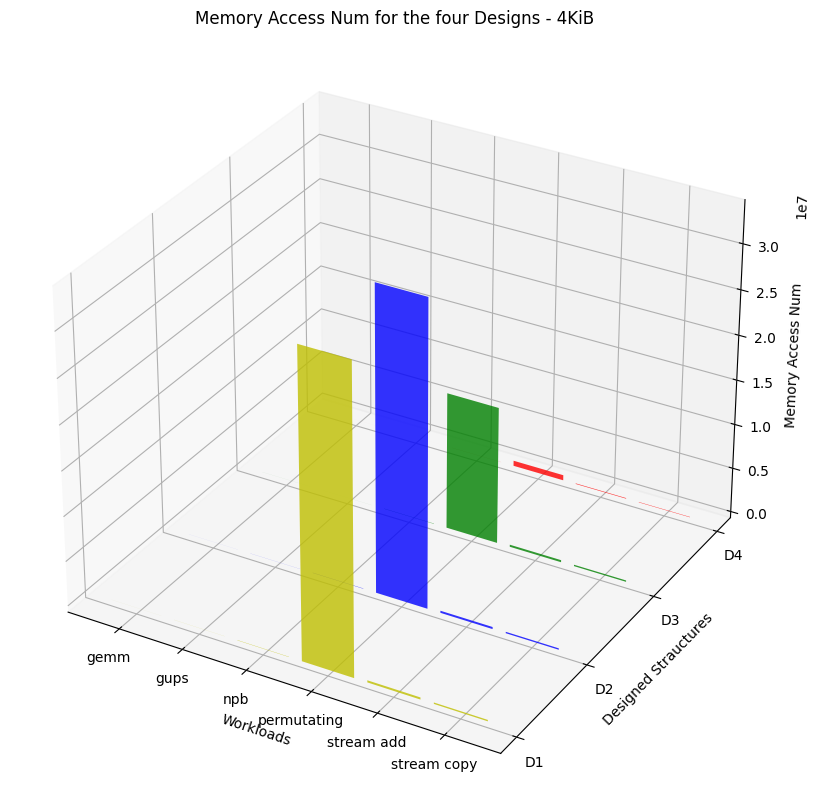

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 10))
mem_access_num_by_workload_n_design = np.mean(mem_access_num_dict, axis=(2)) # [6, 4, 2]
print(mem_access_num_by_workload_n_design)
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D1', 'D2', 'D3', 'D4']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = mem_access_num_by_workload_n_design[:, k-1, 0] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("Memory Access Num")
plt.title('Memory Access Num for the four Designs - 4KiB')
plt.savefig('figures/Memory Access Num-4KiB.png')

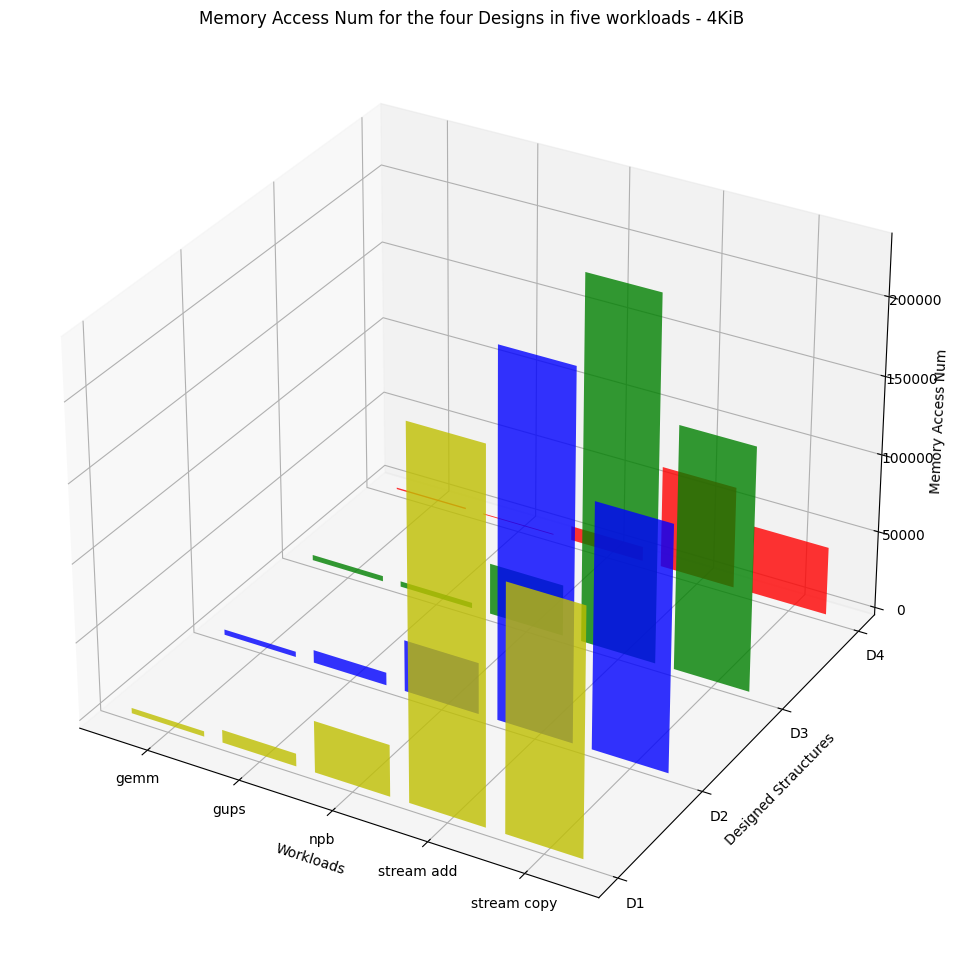

In [3]:
fig = plt.figure(figsize=(12, 12))
mem_access_num_by_workload_n_design = np.mean(mem_access_num_dict, axis=(2)) # [6, 4, 2]
x = np.linspace(1, 5, num=5)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = mem_access_num_by_workload_n_design[[0, 1, 2, 4, 5], k-1, 0] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'stream add', 'stream copy']
yticks = ['D1', 'D2', 'D3', 'D4']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("Memory Access Num")
plt.title('Memory Access Num for the four Designs in five workloads - 4KiB')
plt.savefig('figures/Memory Access Num in five workloads-4KiB.png')

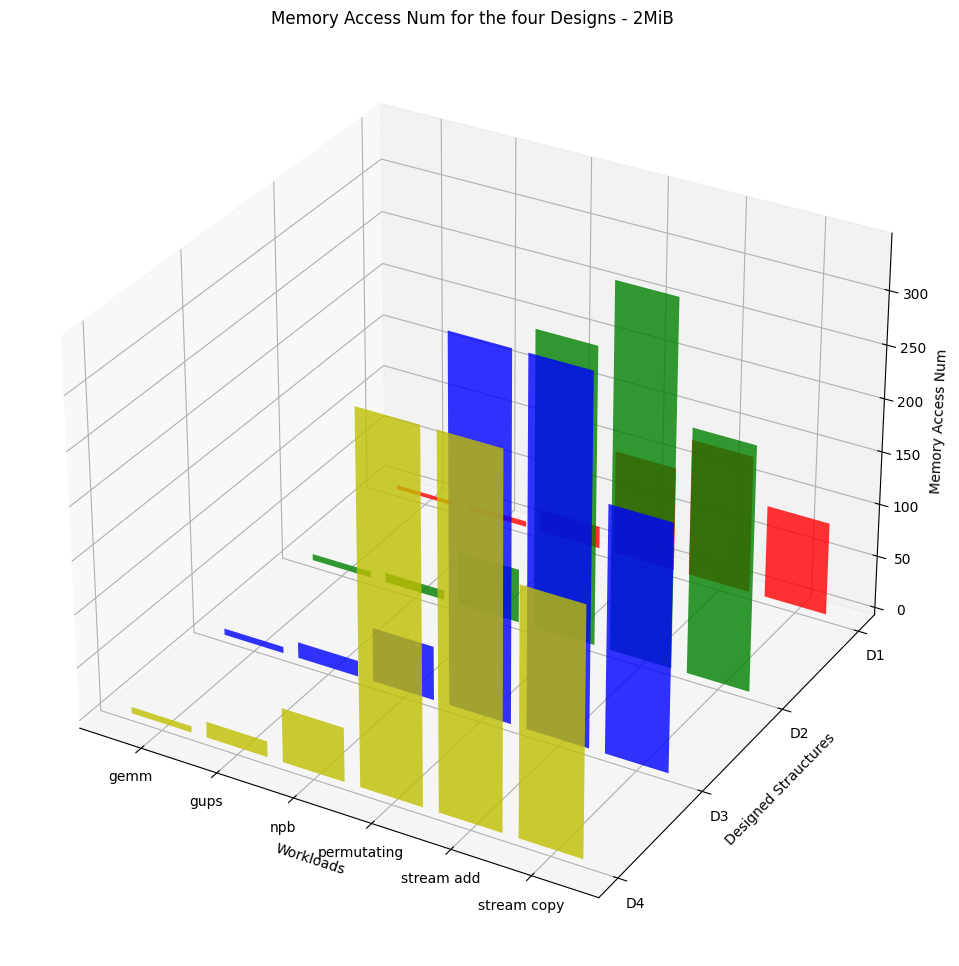

In [4]:
fig = plt.figure(figsize=(12, 12))
mem_access_num_by_workload_n_design = np.mean(mem_access_num_dict, axis=(2)) # [6, 4, 2]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D4', 'D3', 'D2', 'D1']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = mem_access_num_by_workload_n_design[:, k-1, 1] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("Memory Access Num")
plt.title('Memory Access Num for the four Designs - 2MiB')
plt.savefig('figures/Memory Access Num-2MiB.png')

[[[ 0.25        0.33333333]
  [ 0.25        0.33333333]
  [ 0.25        0.33333333]
  [ 1.          1.        ]]

 [[ 0.25        0.33333333]
  [ 0.25        0.33333333]
  [ 0.62783999  0.55555556]
  [10.98829331  2.22222222]]

 [[ 0.25        0.33333333]
  [ 0.25        0.33333333]
  [ 0.2502639   0.33333333]
  [ 1.00140867  1.        ]]

 [[ 0.25        0.33333333]
  [ 0.25        0.33333333]
  [ 0.57729381  0.40879038]
  [34.30681501  1.38485859]]

 [[ 0.25        0.33333333]
  [ 0.25        0.33333333]
  [ 0.25        0.33333333]
  [ 1.          1.        ]]

 [[ 0.25        0.33333333]
  [ 0.25        0.33333333]
  [ 0.25        0.33333333]
  [ 1.          1.        ]]]


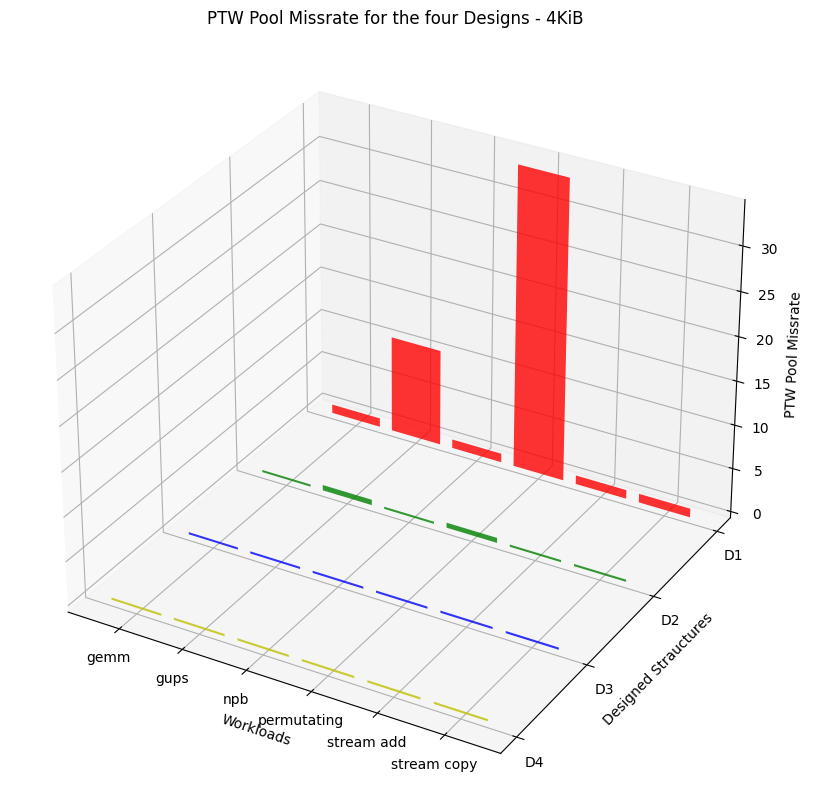

In [5]:
fig = plt.figure(figsize=(10, 10))
ptw_pool_missrate_dict_n_design = np.mean(ptw_pool_missrate_dict, axis=(2)) # [6, 4, 2]
print(ptw_pool_missrate_dict_n_design) 
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D4', 'D3', 'D2', 'D1']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = ptw_pool_missrate_dict_n_design[:, k-1, 0] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("PTW Pool Missrate")
plt.title('PTW Pool Missrate for the four Designs - 4KiB')
plt.savefig('figures/PTW Pool Missrate-4KiB.png')

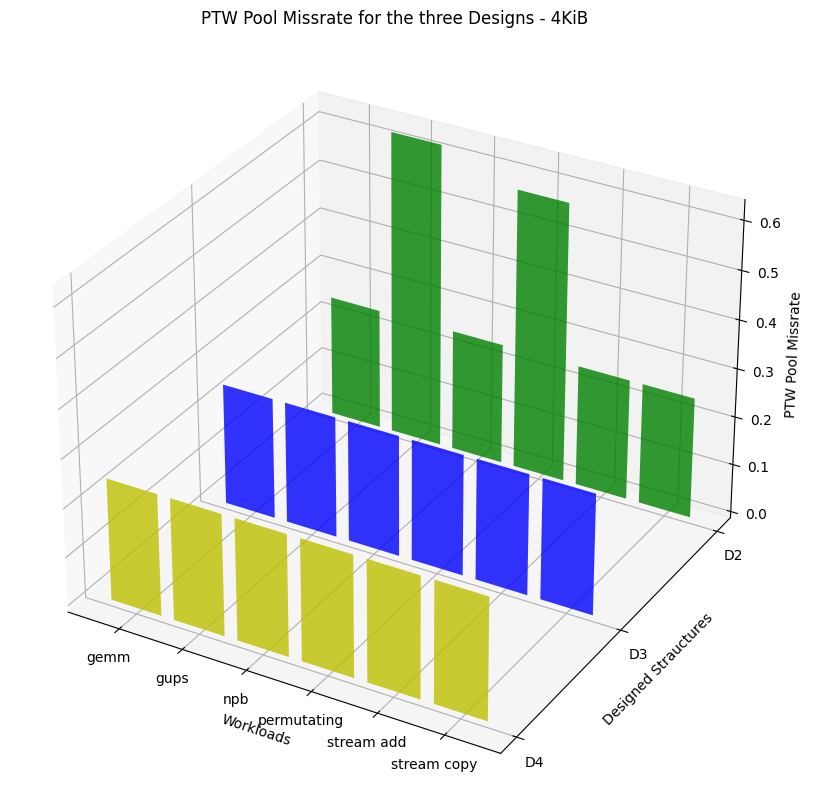

In [6]:
fig = plt.figure(figsize=(10, 10))
ptw_pool_missrate_dict_n_design = np.mean(ptw_pool_missrate_dict, axis=(2)) # [6, 4, 2] 
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 3, num=3)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g']
yticks = ['D4', 'D3', 'D2']
for c, k in zip(colors, [1, 2, 3]):
    xs = x
    ys = ptw_pool_missrate_dict_n_design[:, k-1, 0] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("PTW Pool Missrate")
plt.title('PTW Pool Missrate for the three Designs - 4KiB')
plt.savefig('figures/PTW Pool Missrate in three Designs-4KiB.png')

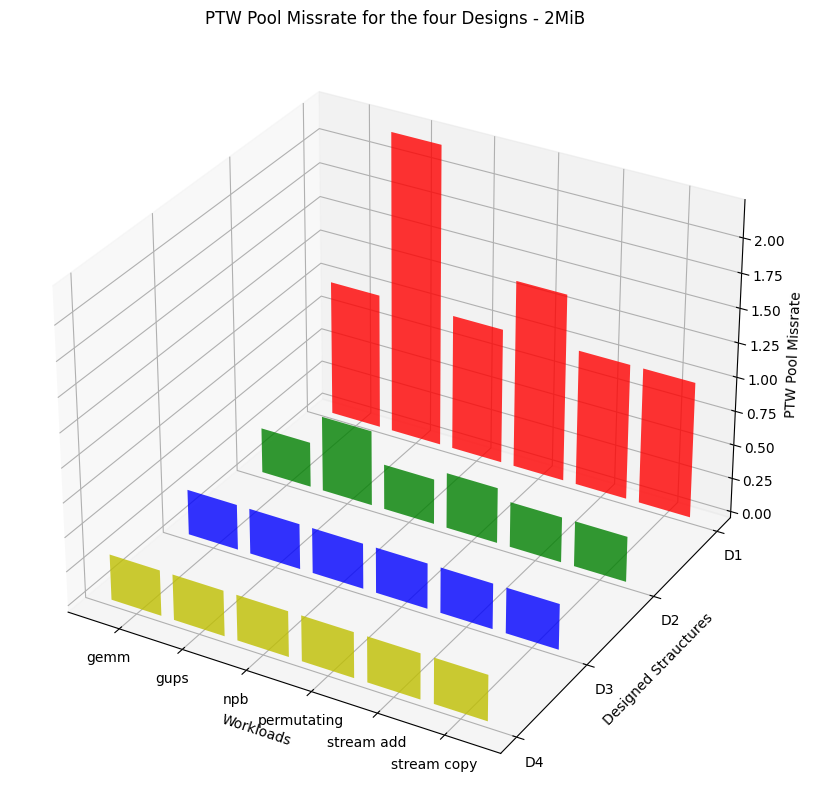

In [7]:
fig = plt.figure(figsize=(10, 10))
ptw_pool_missrate_dict_n_design = np.mean(ptw_pool_missrate_dict, axis=(2)) # [6, 4, 2]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D4', 'D3', 'D2', 'D1']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = ptw_pool_missrate_dict_n_design[:, k-1, 1] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("PTW Pool Missrate")
plt.title('PTW Pool Missrate for the four Designs - 2MiB')
plt.savefig('figures/PTW Pool Missrate-2MiB.png')

[[[5.30772901e-04 5.46875000e-02]
  [7.52136752e-03 9.99999999e-01]
  [7.52136752e-03 9.99999999e-01]
  [7.52136752e-03 9.99999999e-01]]

 [[5.05618137e-04 5.46875000e-02]
  [5.11980853e-04 1.55303030e-01]
  [5.12141696e-04 1.41386074e-01]
  [5.11795563e-04 1.58121597e-01]]

 [[6.96526524e-02 7.15144231e-02]
  [7.00253989e-01 1.00000000e+00]
  [7.00253989e-01 1.00000000e+00]
  [7.00253989e-01 1.00000000e+00]]

 [[4.26355589e-01 5.46875000e-02]
  [8.47611323e-01 1.55268870e-01]
  [8.47611323e-01 1.55268870e-01]
  [8.47611323e-01 1.55268870e-01]]

 [[5.46875000e-02 5.37526709e-02]
  [1.00000000e+00 9.82905983e-01]
  [1.00000000e+00 9.82905983e-01]
  [1.00000000e+00 9.82905983e-01]]

 [[5.46875000e-02 5.39863782e-02]
  [1.00000000e+00 9.87179487e-01]
  [1.00000000e+00 9.87179487e-01]
  [1.00000000e+00 9.87179487e-01]]]


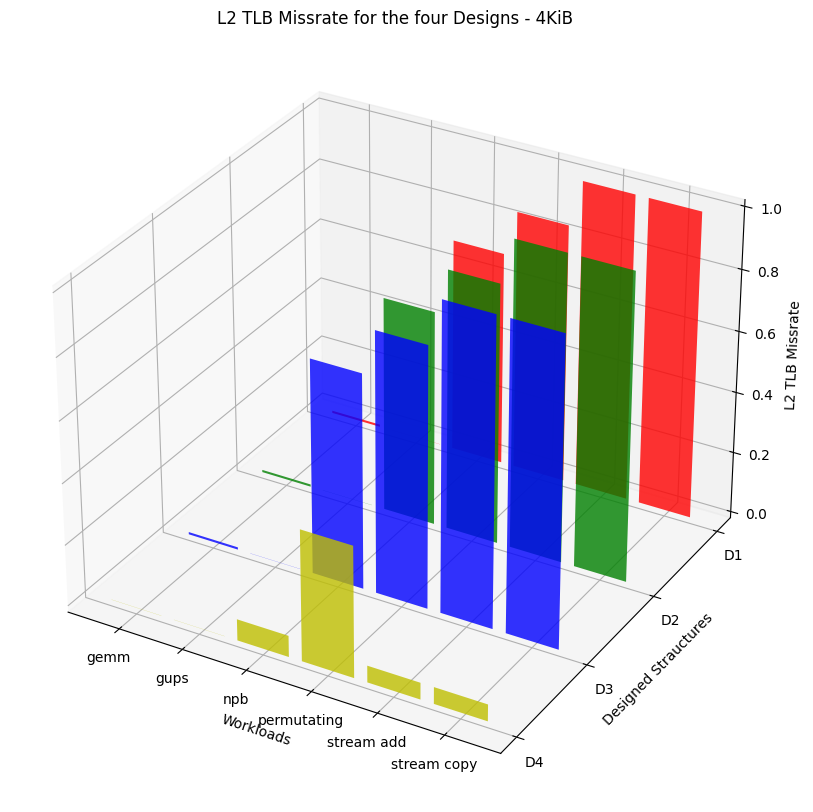

In [8]:
fig = plt.figure(figsize=(10, 10))
l2_tlb_missrate_dict_n_design = np.mean(l2_tlb_missrate_dict, axis=(2)) # [6, 4, 2]
print(l2_tlb_missrate_dict_n_design) 
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D4', 'D3', 'D2', 'D1']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = l2_tlb_missrate_dict_n_design[:, k-1, 0] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("L2 TLB Missrate")
plt.title('L2 TLB Missrate for the four Designs - 4KiB')
plt.savefig('figures/L2 TLB Missrate-4KiB.png')

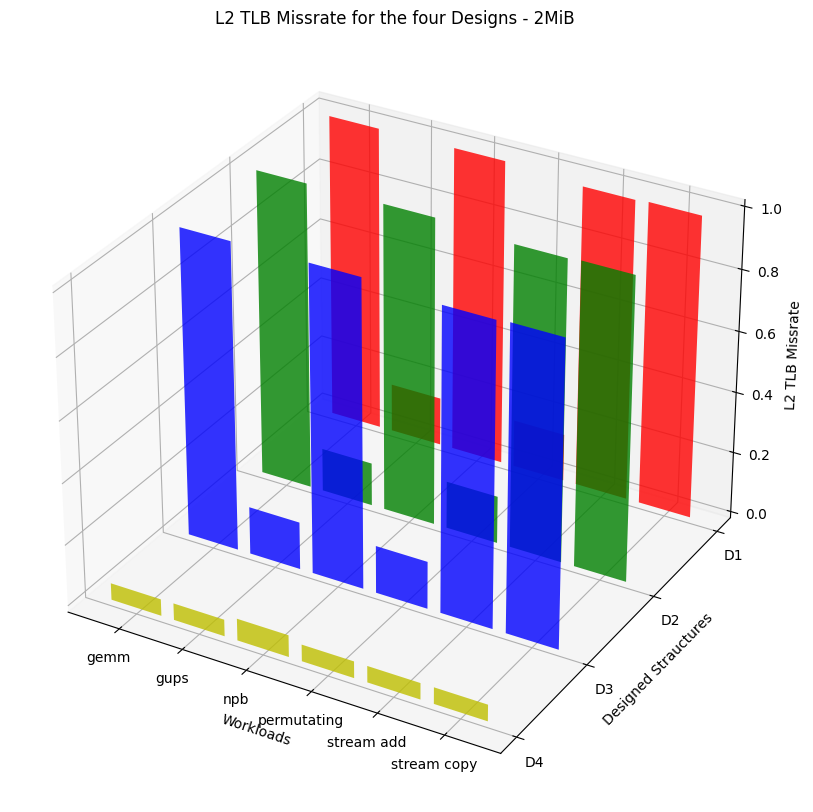

In [9]:
fig = plt.figure(figsize=(10, 10))
l2_tlb_missrate_dict_n_design = np.mean(l2_tlb_missrate_dict, axis=(2)) # [6, 4, 2]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D4', 'D3', 'D2', 'D1']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = l2_tlb_missrate_dict_n_design[:, k-1, 1] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("L2 TLB Missrate")
plt.title('L2 TLB Missrate for the four Designs - 2MiB')
plt.savefig('figures/L2 TLB Missrate-2MiB.png')

[[[0.063125   0.01578125 0.00392116]
  [0.505      0.505      0.50128205]
  [0.505      0.505      0.50128205]
  [0.505      0.505      0.50128205]]

 [[0.06275289 0.01587786 0.00415892]
  [0.12525339 0.06275467 0.04571445]
  [0.10894894 0.05977864 0.04411975]
  [0.13183212 0.06275465 0.04336332]]

 [[0.1649528  0.0412382  0.00555961]
  [1.         0.99951415 0.55086683]
  [1.         0.99951415 0.55086683]
  [1.         0.99951415 0.55086683]]

 [[0.27625416 0.22912578 0.21618469]
  [0.58247624 0.47647304 0.445371  ]
  [0.58247624 0.47647304 0.445371  ]
  [0.58247624 0.47647304 0.445371  ]]

 [[0.12393162 0.03098291 0.00774573]
  [0.99145299 0.99145299 0.99145299]
  [0.99145299 0.99145299 0.99145299]
  [0.99145299 0.99145299 0.99145299]]

 [[0.12419872 0.03104968 0.00776242]
  [0.99358974 0.99358974 0.99358974]
  [0.99358974 0.99358974 0.99358974]
  [0.99358974 0.99358974 0.99358974]]]


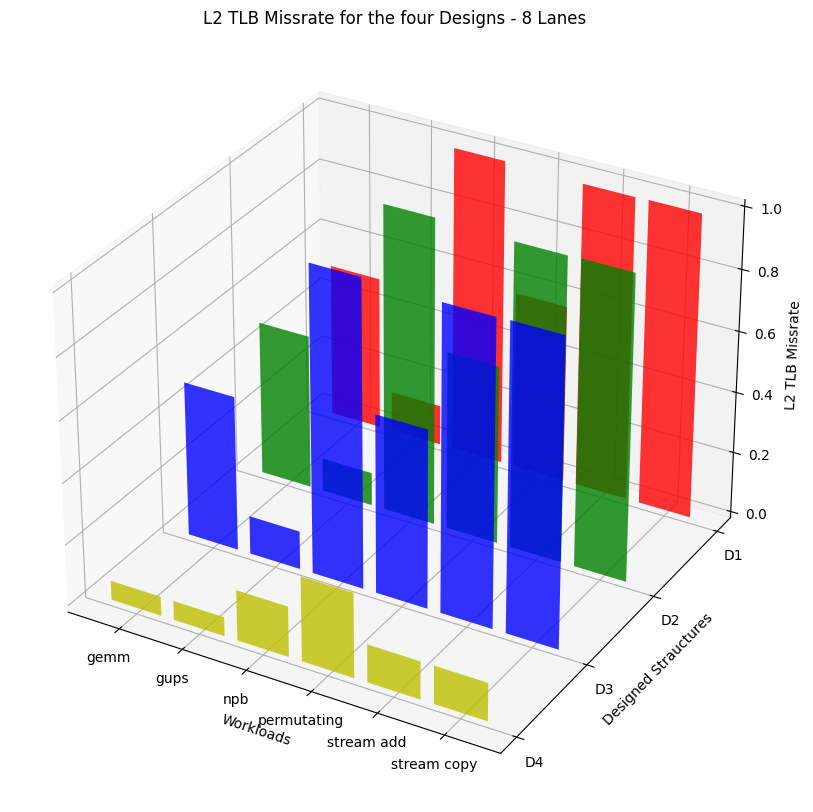

In [10]:
fig = plt.figure(figsize=(10, 10))
l2_tlb_missrate_dict_n_design = np.mean(l2_tlb_missrate_dict, axis=(3)) # [6, 4, 3]
print(l2_tlb_missrate_dict_n_design) 
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D4', 'D3', 'D2', 'D1']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = l2_tlb_missrate_dict_n_design[:, k-1, 0] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("L2 TLB Missrate")
plt.title('L2 TLB Missrate for the four Designs - 8 Lanes')
plt.savefig('figures/L2 TLB Missrate-8Lanes.png')

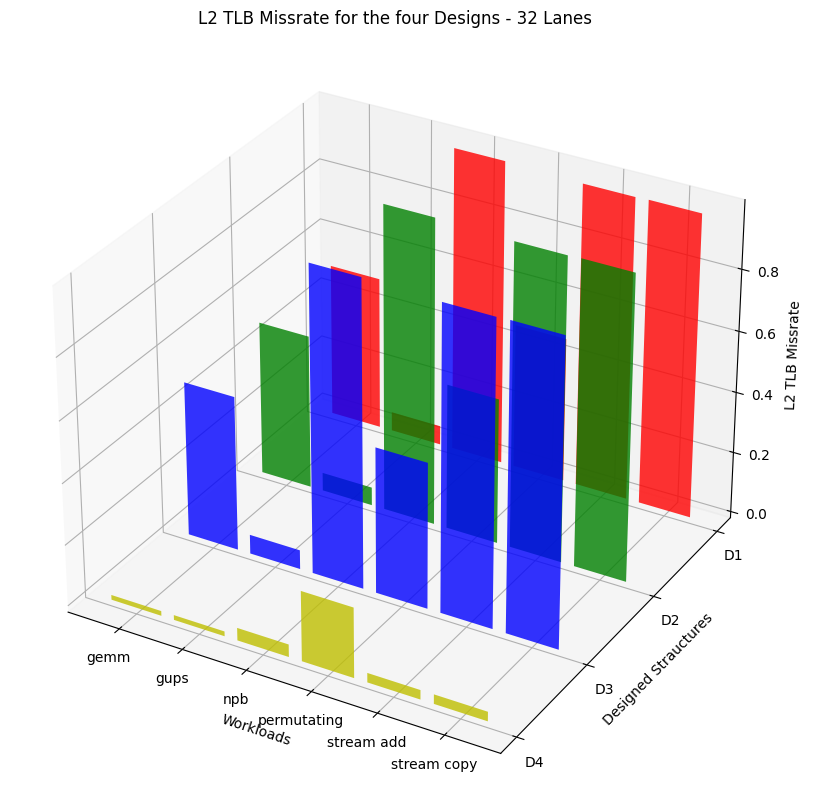

In [11]:
fig = plt.figure(figsize=(10, 10))
l2_tlb_missrate_dict_n_design = np.mean(l2_tlb_missrate_dict, axis=(3)) # [6, 4, 3]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D4', 'D3', 'D2', 'D1']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = l2_tlb_missrate_dict_n_design[:, k-1, 1] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("L2 TLB Missrate")
plt.title('L2 TLB Missrate for the four Designs - 32 Lanes')
plt.savefig('figures/L2 TLB Missrate-32Lanes.png')

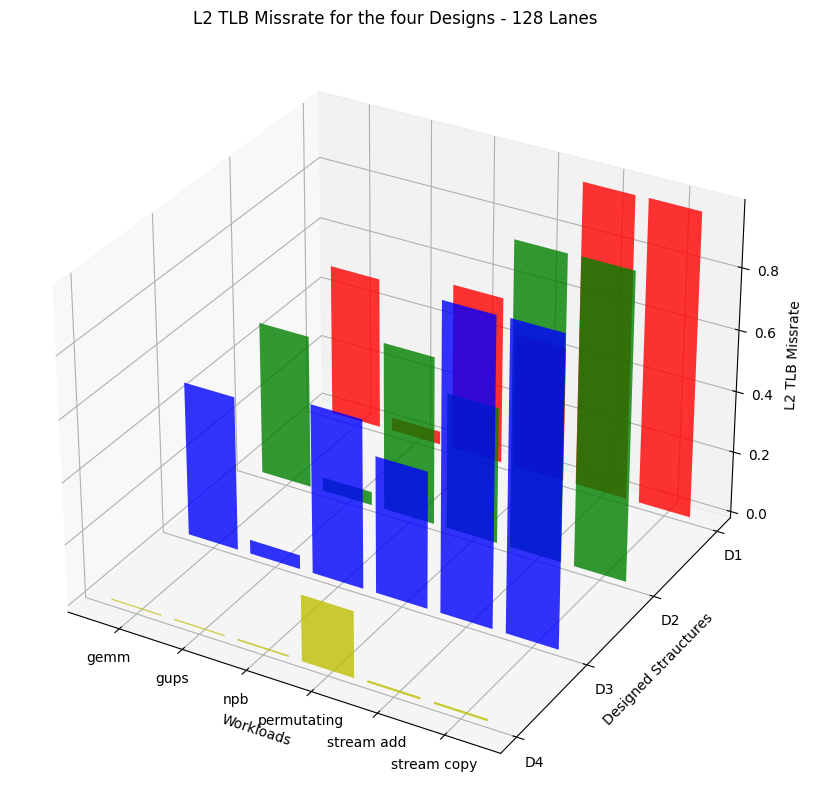

In [12]:
fig = plt.figure(figsize=(10, 10))
l2_tlb_missrate_dict_n_design = np.mean(l2_tlb_missrate_dict, axis=(3)) # [6, 4, 3]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D4', 'D3', 'D2', 'D1']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = l2_tlb_missrate_dict_n_design[:, k-1, 2] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("L2 TLB Missrate")
plt.title('L2 TLB Missrate for the four Designs - 128 Lanes')
plt.savefig('figures/L2 TLB Missrate-128Lanes.png')

[[[4.79642428e-02 4.99931835e-07]
  [6.87975761e-02 4.99931835e-07]
  [6.87975761e-02 4.99931835e-07]
  [6.87975761e-02 4.99931835e-07]]

 [[2.41545796e-01 1.66893005e-05]
  [2.41644422e-01 1.66893005e-05]
  [2.41615474e-01 1.66893005e-05]
  [2.41755128e-01 1.66893005e-05]]

 [[2.21196530e-02 5.10496252e-06]
  [2.19921458e-02 5.10496252e-06]
  [2.19921458e-02 5.10496252e-06]
  [2.19921458e-02 5.10496252e-06]]

 [[6.65230200e-01 2.14666667e-04]
  [4.05246089e-01 2.14666667e-04]
  [4.05246089e-01 2.14666667e-04]
  [4.05246089e-01 2.14666667e-04]]

 [[1.09379200e-01 2.18400000e-04]
  [1.09379200e-01 2.18400000e-04]
  [1.09379200e-01 2.18400000e-04]
  [1.09379200e-01 2.18400000e-04]]

 [[1.09379200e-01 2.18400000e-04]
  [1.09379200e-01 2.18400000e-04]
  [1.09379200e-01 2.18400000e-04]
  [1.09379200e-01 2.18400000e-04]]]


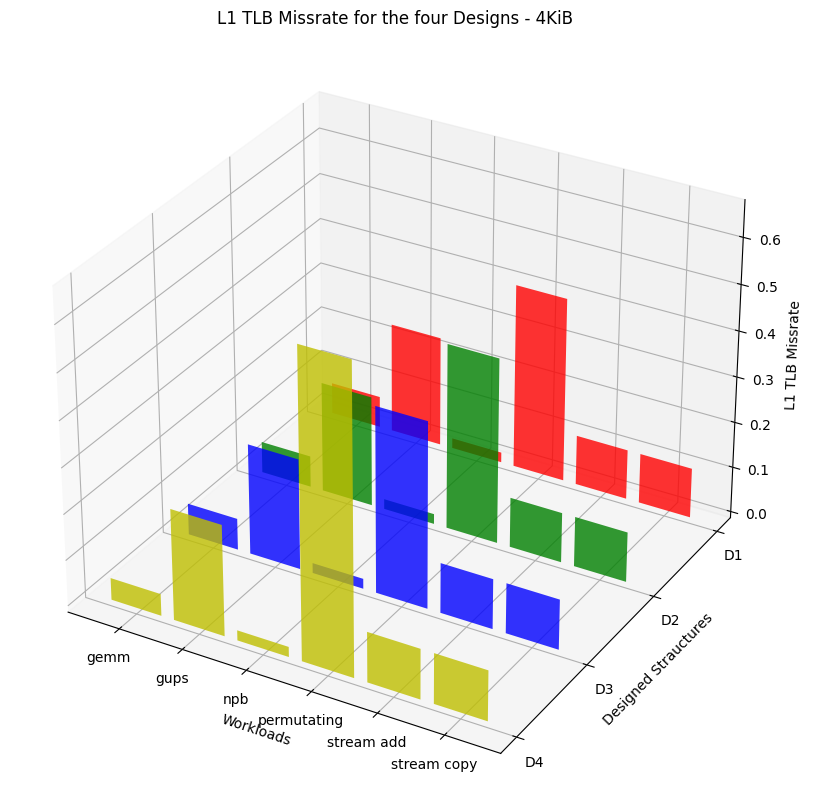

In [13]:
fig = plt.figure(figsize=(10, 10))
l1_tlb_missrate_dict_n_design = np.mean(l1_tlb_missrate_dict, axis=(2)) # [6, 4, 2]
print(l1_tlb_missrate_dict_n_design) 
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D4', 'D3', 'D2', 'D1']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = l1_tlb_missrate_dict_n_design[:, k-1, 0] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("L1 TLB Missrate")
plt.title('L1 TLB Missrate for the four Designs - 4KiB')
plt.savefig('figures/L1 TLB Missrate-4KiB.png')

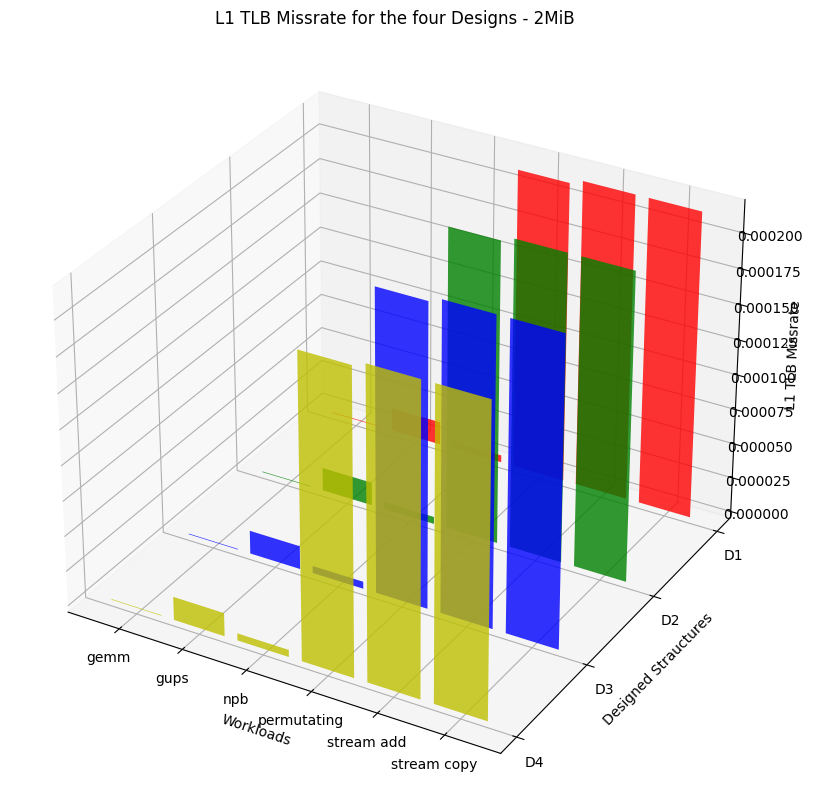

In [14]:
fig = plt.figure(figsize=(10, 10))
l1_tlb_missrate_dict_n_design = np.mean(l1_tlb_missrate_dict, axis=(2)) # [6, 4, 2]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D4', 'D3', 'D2', 'D1']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = l1_tlb_missrate_dict_n_design[:, k-1, 1] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("L1 TLB Missrate")
plt.title('L1 TLB Missrate for the four Designs - 2MiB')
plt.savefig('figures/L1 TLB Missrate-2MiB.png')

[[[1.87804828e-03 6.10365691e-03 6.39654089e-02]
  [1.87804828e-03 6.10365691e-03 9.52154089e-02]
  [1.87804828e-03 6.10365691e-03 9.52154089e-02]
  [1.87804828e-03 6.10365691e-03 9.52154089e-02]]

 [[1.20734334e-01 1.20751619e-01 1.20857775e-01]
  [1.20698154e-01 1.20767027e-01 1.21026486e-01]
  [1.20765418e-01 1.20706975e-01 1.20975852e-01]
  [1.20804012e-01 1.20791376e-01 1.21062338e-01]]

 [[1.73624824e-04 6.94499296e-04 3.23190128e-02]
  [1.73624824e-04 6.94499296e-04 3.21277520e-02]
  [1.73624824e-04 6.94499296e-04 3.21277520e-02]
  [1.73624824e-04 6.94499296e-04 3.21277520e-02]]

 [[3.32656933e-01 3.32683533e-01 3.32826833e-01]
  [1.71309550e-01 1.87031817e-01 2.49849767e-01]
  [1.71309550e-01 1.87031817e-01 2.49849767e-01]
  [1.71309550e-01 1.87031817e-01 2.49849767e-01]]

 [[7.82840000e-03 3.13136000e-02 1.25254400e-01]
  [7.82840000e-03 3.13136000e-02 1.25254400e-01]
  [7.82840000e-03 3.13136000e-02 1.25254400e-01]
  [7.82840000e-03 3.13136000e-02 1.25254400e-01]]

 [[7.82840

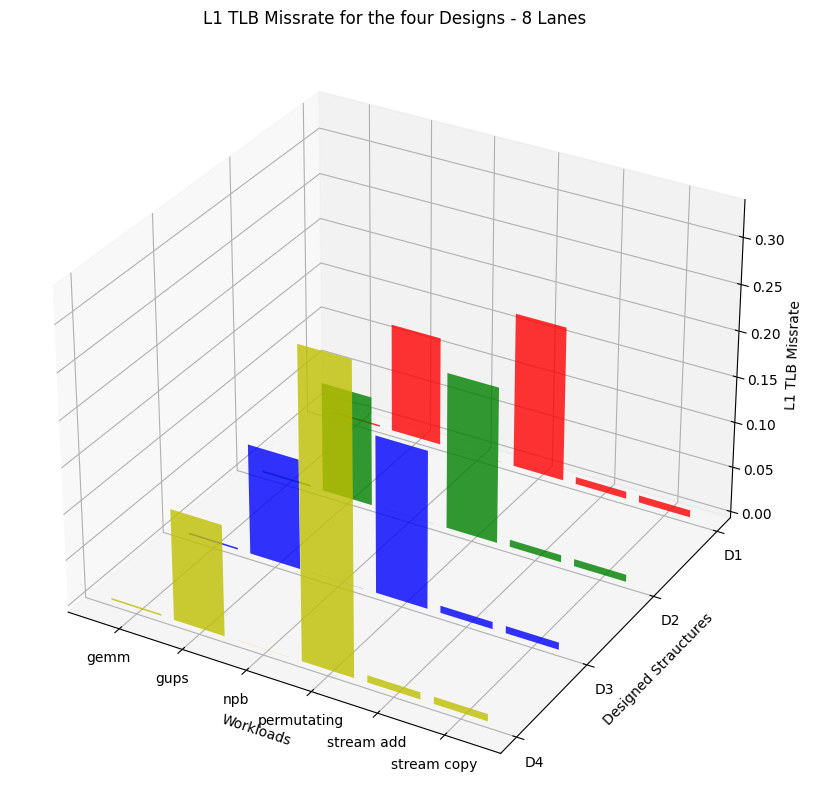

In [15]:
fig = plt.figure(figsize=(10, 10))
l1_tlb_missrate_dict_n_design = np.mean(l1_tlb_missrate_dict, axis=(3)) # [6, 4, 3]
print(l1_tlb_missrate_dict_n_design) 
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D4', 'D3', 'D2', 'D1']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = l1_tlb_missrate_dict_n_design[:, k-1, 0] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("L1 TLB Missrate")
plt.title('L1 TLB Missrate for the four Designs - 8 Lanes')
plt.savefig('figures/L1 TLB Missrate-8Lanes.png')

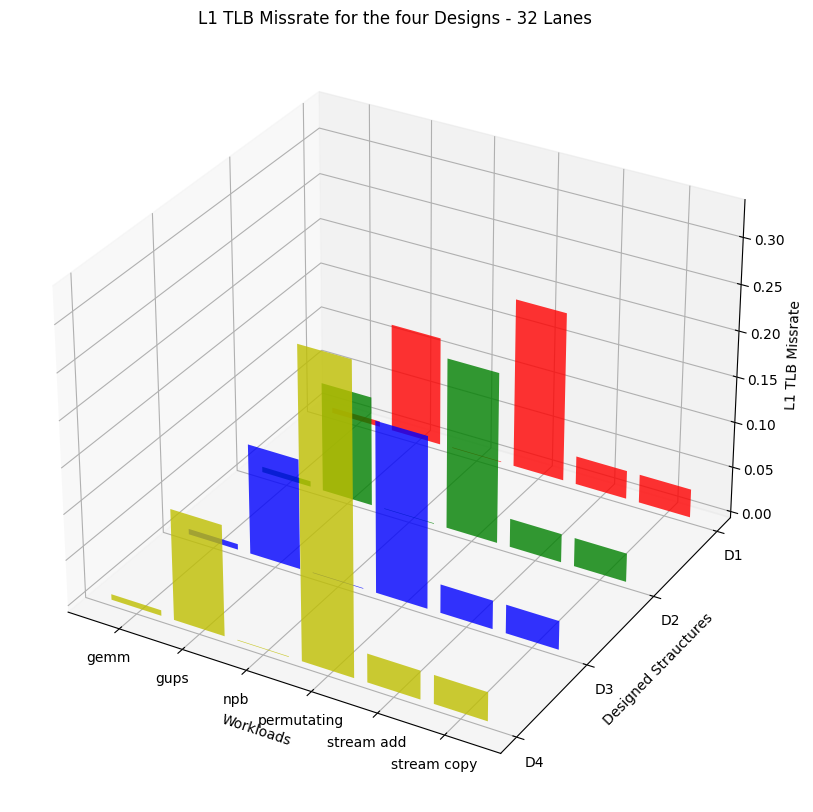

In [16]:
fig = plt.figure(figsize=(10, 10))
l1_tlb_missrate_dict_n_design = np.mean(l1_tlb_missrate_dict, axis=(3)) # [6, 4, 3]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D4', 'D3', 'D2', 'D1']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = l1_tlb_missrate_dict_n_design[:, k-1, 1] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("L1 TLB Missrate")
plt.title('L1 TLB Missrate for the four Designs - 32 Lanes')
plt.savefig('figures/L1 TLB Missrate-32Lanes.png')

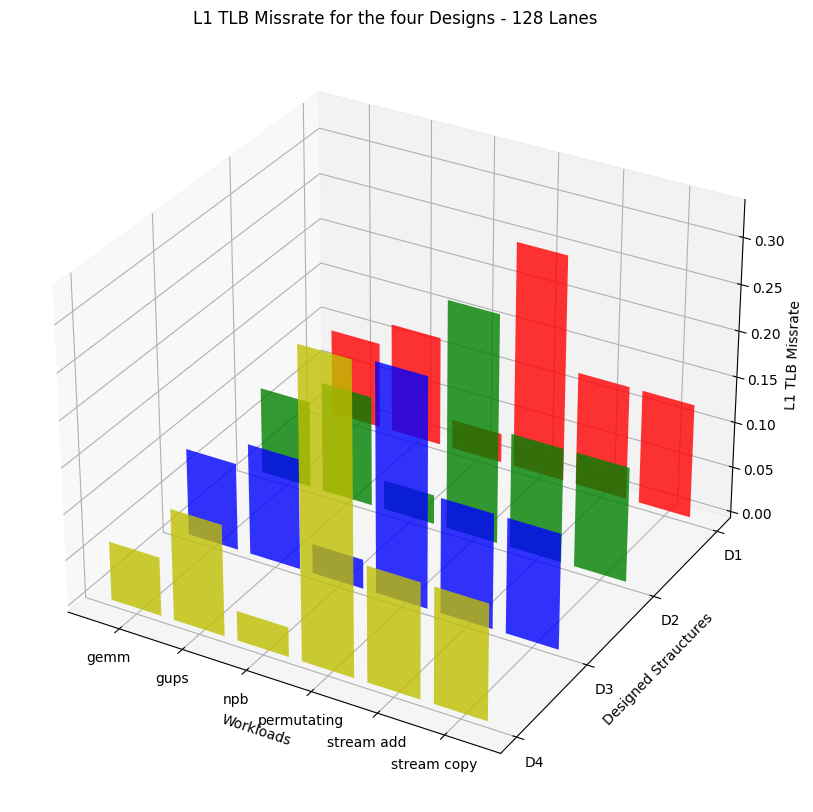

In [17]:
fig = plt.figure(figsize=(10, 10))
l1_tlb_missrate_dict_n_design = np.mean(l1_tlb_missrate_dict, axis=(3)) # [6, 4, 3]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 4, num=4)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g', 'r']
yticks = ['D4', 'D3', 'D2', 'D1']
for c, k in zip(colors, [1, 2, 3, 4]):
    xs = x
    ys = l1_tlb_missrate_dict_n_design[:, k-1, 2] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("L1 TLB Missrate")
plt.title('L1 TLB Missrate for the four Designs - 128 Lanes')
plt.savefig('figures/L1 TLB Missrate-128Lanes.png')

[[[0.0546875  0.0546875 ]
  [0.0546875  0.0546875 ]
  [0.0546875  0.0546875 ]]

 [[0.98730122 0.27864583]
  [0.98711453 0.30885417]
  [0.98720904 0.271875  ]]

 [[0.07234109 0.07151442]
  [0.07234109 0.07151442]
  [0.07234109 0.07151442]]

 [[0.8437166  0.29094203]
  [0.8437166  0.29094203]
  [0.8437166  0.29094203]]

 [[0.0546875  0.0546875 ]
  [0.0546875  0.0546875 ]
  [0.0546875  0.0546875 ]]

 [[0.0546875  0.0546875 ]
  [0.0546875  0.0546875 ]
  [0.0546875  0.0546875 ]]]


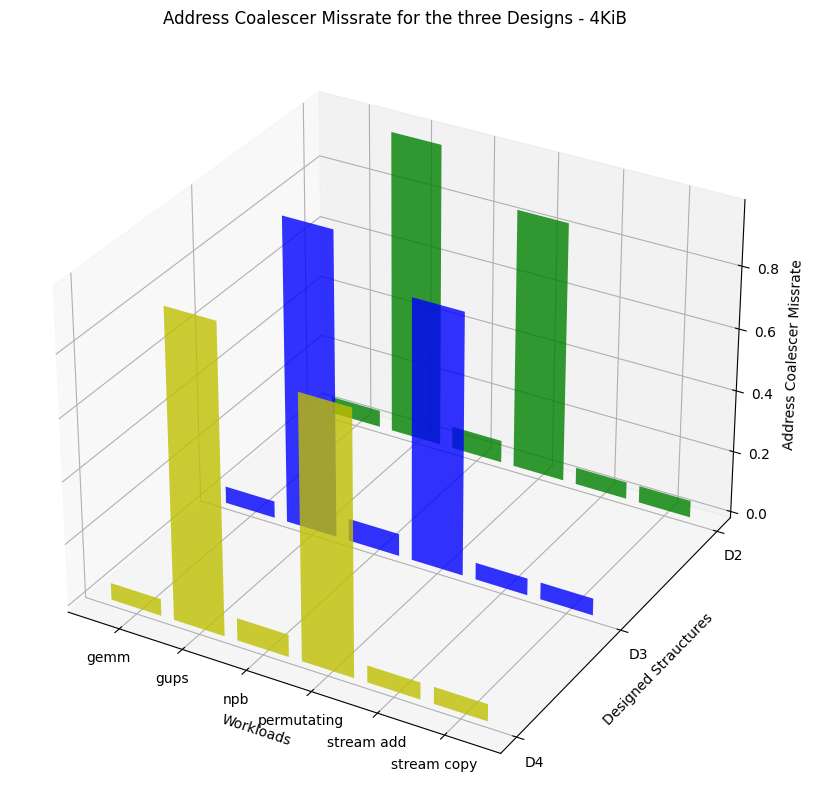

In [18]:
fig = plt.figure(figsize=(10, 10))
address_coalescer_missrate_n_design = np.mean(address_coalescer_missrate_dict, axis=(2)) # [6, 3, 2]
print(address_coalescer_missrate_n_design) 
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 3, num=3)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g']
yticks = ['D4', 'D3', 'D2']
for c, k in zip(colors, [1, 2, 3]):
    xs = x
    ys = address_coalescer_missrate_n_design[:, k-1, 0] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("Address Coalescer Missrate")
plt.title('Address Coalescer Missrate for the three Designs - 4KiB')
plt.savefig('figures/Address Coalescer Missrate-4KiB.png')

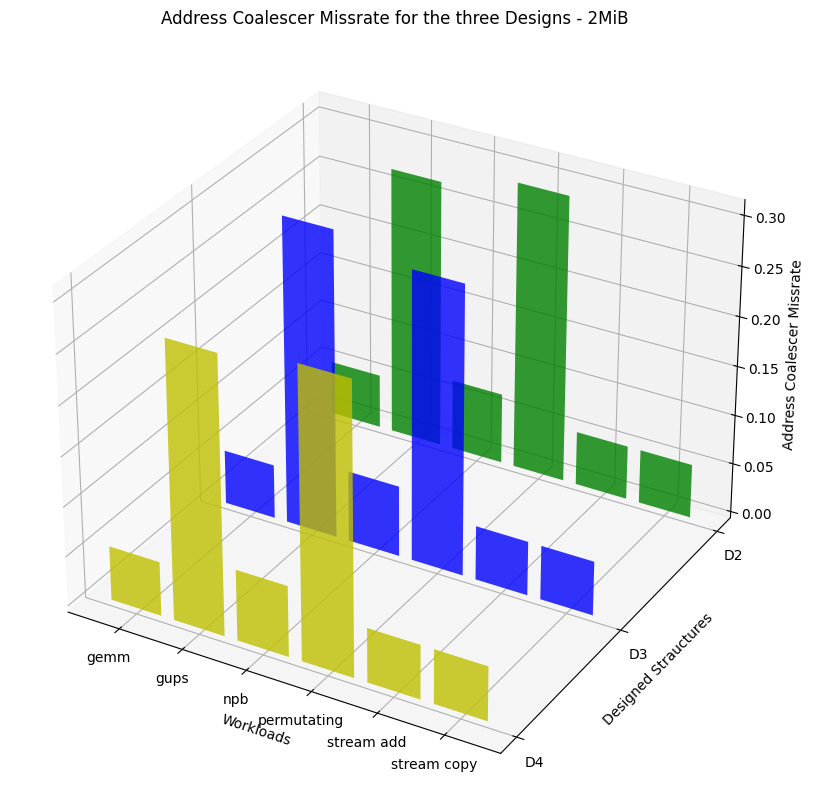

In [19]:
fig = plt.figure(figsize=(10, 10))
address_coalescer_missrate_n_design = np.mean(address_coalescer_missrate_dict, axis=(2)) # [6, 3, 2]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 3, num=3)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g']
yticks = ['D4', 'D3', 'D2']
for c, k in zip(colors, [1, 2, 3]):
    xs = x
    ys = address_coalescer_missrate_n_design[:, k-1, 1] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("Address Coalescer Missrate")
plt.title('Address Coalescer Missrate for the three Designs - 2MiB')
plt.savefig('figures/Address Coalescer Missrate-2MiB.png')

[[[0.125      0.03125    0.0078125 ]
  [0.125      0.03125    0.0078125 ]
  [0.125      0.03125    0.0078125 ]]

 [[0.74916171 0.62139003 0.52836885]
  [0.7865974  0.62758046 0.52977518]
  [0.73664925 0.62133438 0.53064244]]

 [[0.1649528  0.04125844 0.00957203]
  [0.1649528  0.04125844 0.00957203]
  [0.1649528  0.04125844 0.00957203]]

 [[0.68334916 0.59390761 0.42473117]
  [0.68334916 0.59390761 0.42473117]
  [0.68334916 0.59390761 0.42473117]]

 [[0.125      0.03125    0.0078125 ]
  [0.125      0.03125    0.0078125 ]
  [0.125      0.03125    0.0078125 ]]

 [[0.125      0.03125    0.0078125 ]
  [0.125      0.03125    0.0078125 ]
  [0.125      0.03125    0.0078125 ]]]


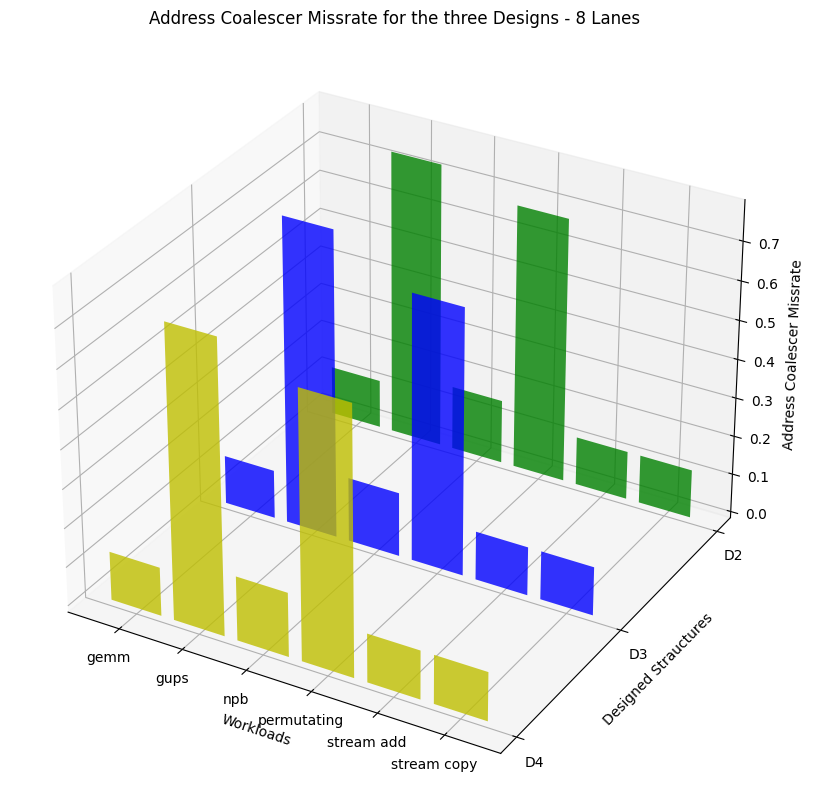

In [20]:
fig = plt.figure(figsize=(10, 10))
address_coalescer_missrate_n_design = np.mean(address_coalescer_missrate_dict, axis=(3)) # [6, 3, 3]
print(address_coalescer_missrate_n_design) 
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 3, num=3)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g']
yticks = ['D4', 'D3', 'D2']
for c, k in zip(colors, [1, 2, 3]):
    xs = x
    ys = address_coalescer_missrate_n_design[:, k-1, 0] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("Address Coalescer Missrate")
plt.title('Address Coalescer Missrate for the three Designs - 8 Lanes')
plt.savefig('figures/Address Coalescer Missrate-8Lanes.png')

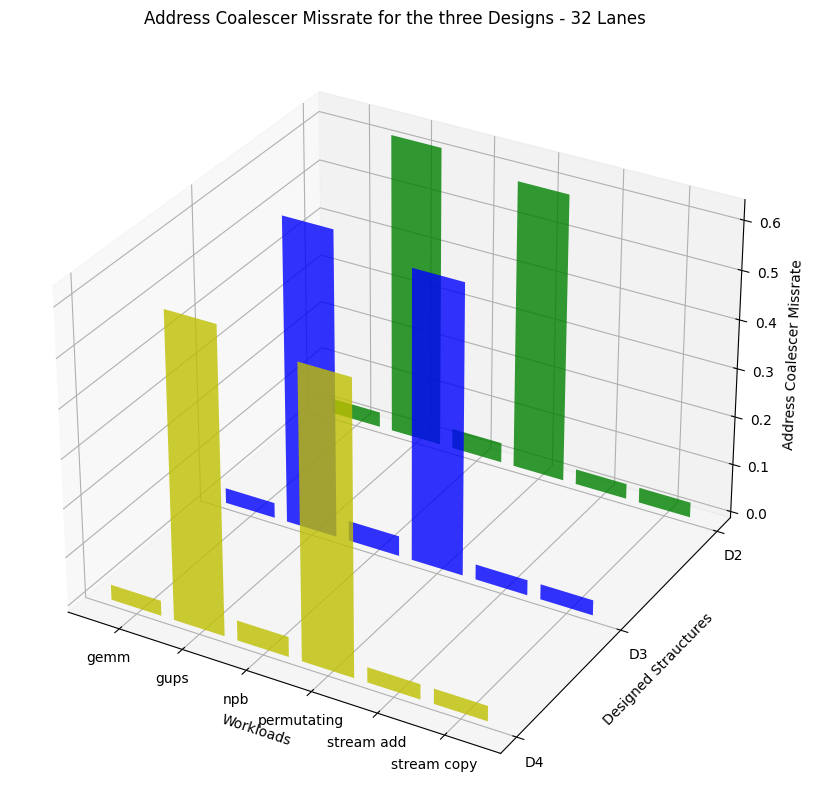

In [21]:
fig = plt.figure(figsize=(10, 10))
address_coalescer_missrate_n_design = np.mean(address_coalescer_missrate_dict, axis=(3)) # [6, 3, 3]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 3, num=3)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g']
yticks = ['D4', 'D3', 'D2']
for c, k in zip(colors, [1, 2, 3]):
    xs = x
    ys = address_coalescer_missrate_n_design[:, k-1, 1] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("Address Coalescer Missrate")
plt.title('Address Coalescer Missrate for the three Designs - 32 Lanes')
plt.savefig('figures/Address Coalescer Missrate-32Lanes.png')

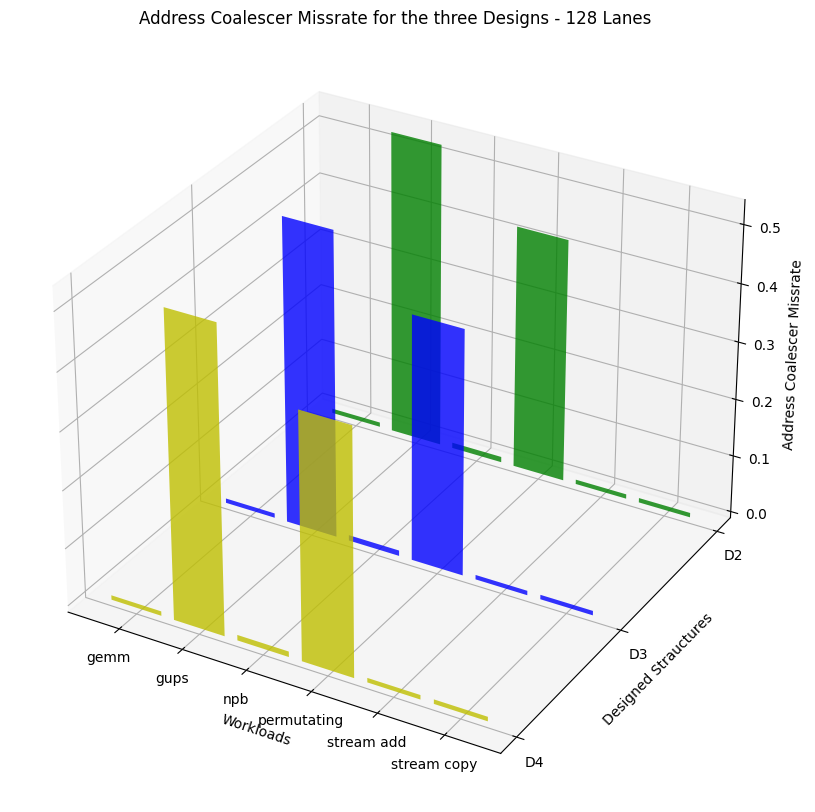

In [22]:
fig = plt.figure(figsize=(10, 10))
address_coalescer_missrate_n_design = np.mean(address_coalescer_missrate_dict, axis=(3)) # [6, 3, 3]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 3, num=3)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g']
yticks = ['D4', 'D3', 'D2']
for c, k in zip(colors, [1, 2, 3]):
    xs = x
    ys = address_coalescer_missrate_n_design[:, k-1, 2] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("Address Coalescer Missrate")
plt.title('Address Coalescer Missrate for the three Designs - 128 Lanes')
plt.savefig('figures/Address Coalescer Missrate-128Lanes.png')

[[[1.15740741e-03 1.15740741e-03 1.25000000e-01]
  [5.00000000e-01 5.00000000e-01 0.00000000e+00]]

 [[5.36275906e-03 3.99345184e-03 1.25427038e-01]
  [4.44444444e-01 4.00000000e-01 0.00000000e+00]]

 [[1.21282504e-04 3.63847512e-04 1.25105974e-01]
  [5.88235294e-02 1.76470588e-01 0.00000000e+00]]

 [[4.05113790e-06 3.18382230e-06 8.64871661e-04]
  [1.20422486e-02 1.30434783e-01 0.00000000e+00]]

 [[1.70660113e-05 2.55990170e-04 1.25042665e-01]
  [8.69565217e-03 1.30434783e-01 0.00000000e+00]]

 [[2.55990170e-05 2.55990170e-04 1.25025599e-01]
  [1.29870130e-02 1.29870130e-01 0.00000000e+00]]]


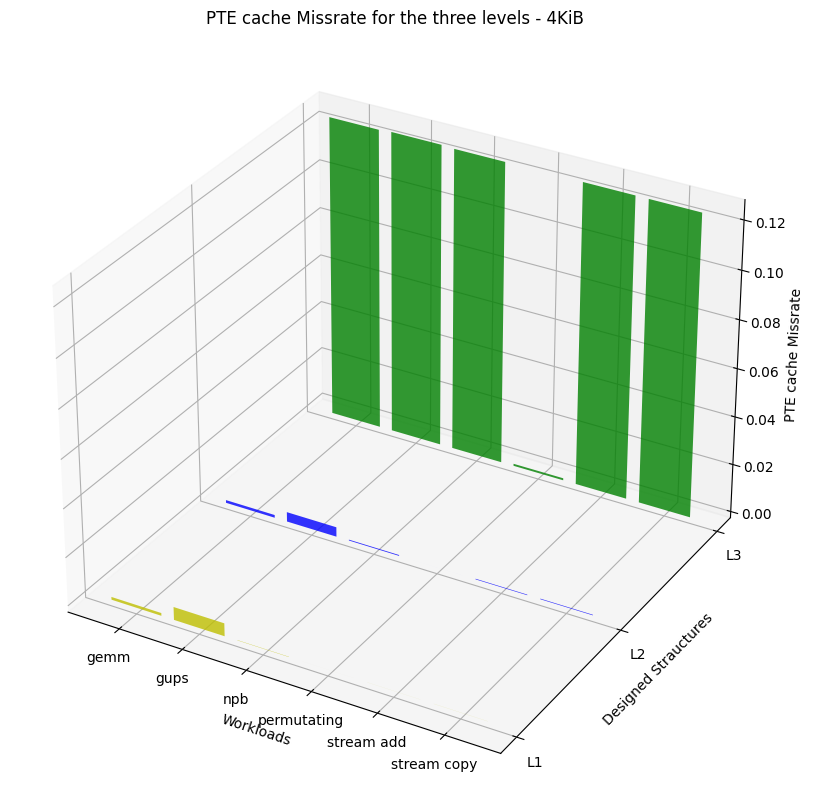

In [23]:
fig = plt.figure(figsize=(10, 10))
pte_cache_missrate_n_design = np.mean(pte_cache_missrate_dict, axis=(1)) # [6, 2, 3]
print(pte_cache_missrate_n_design) 
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 3, num=3)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g']
yticks = ['L1', 'L2', 'L3']
for c, k in zip(colors, [1, 2, 3]):
    xs = x
    ys = pte_cache_missrate_n_design[:, 0, k-1] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("PTE cache Missrate")
plt.title('PTE cache Missrate for the three levels - 4KiB')
plt.savefig('figures/PTE cache Missrate-4KiB.png')

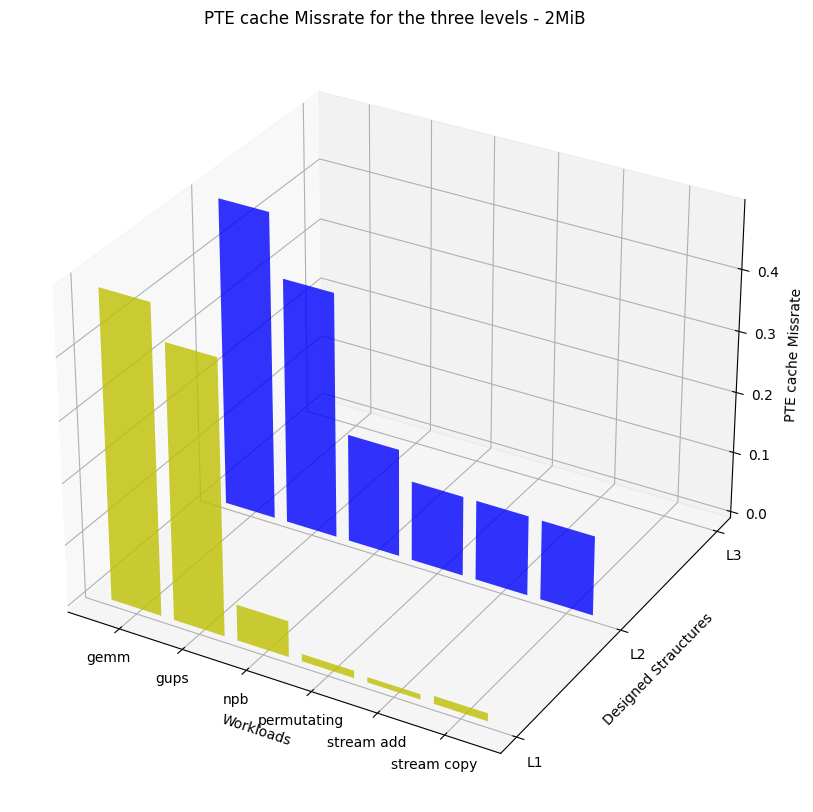

In [24]:
fig = plt.figure(figsize=(10, 10))
pte_cache_missrate_n_design = np.mean(pte_cache_missrate_dict, axis=(1)) # [6, 2, 3]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 3, num=3)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g']
yticks = ['L1', 'L2', 'L3']
for c, k in zip(colors, [1, 2, 3]):
    xs = x
    ys = pte_cache_missrate_n_design[:, 1, k-1] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("PTE cache Missrate")
plt.title('PTE cache Missrate for the three levels - 2MiB')
plt.savefig('figures/PTE cache Missrate-2MiB.png')

[[[0.2505787  0.2505787  0.0625    ]
  [0.2505787  0.2505787  0.0625    ]
  [0.2505787  0.2505787  0.0625    ]]

 [[0.16737488 0.20073153 0.06271352]
  [0.25190114 0.20149925 0.06271352]
  [0.25543478 0.2037594  0.06271352]]

 [[0.02947255 0.08841766 0.06255319]
  [0.02947258 0.08841775 0.06255319]
  [0.02947208 0.08841624 0.06255258]]

 [[0.00555594 0.06521835 0.00043228]
  [0.00609898 0.06521861 0.00043228]
  [0.00641452 0.06521999 0.00043274]]

 [[0.00435636 0.06534539 0.06252133]
  [0.00435636 0.06534539 0.06252133]
  [0.00435636 0.06534539 0.06252133]]

 [[0.00650631 0.06506306 0.0625128 ]
  [0.00650631 0.06506306 0.0625128 ]
  [0.00650631 0.06506306 0.0625128 ]]]


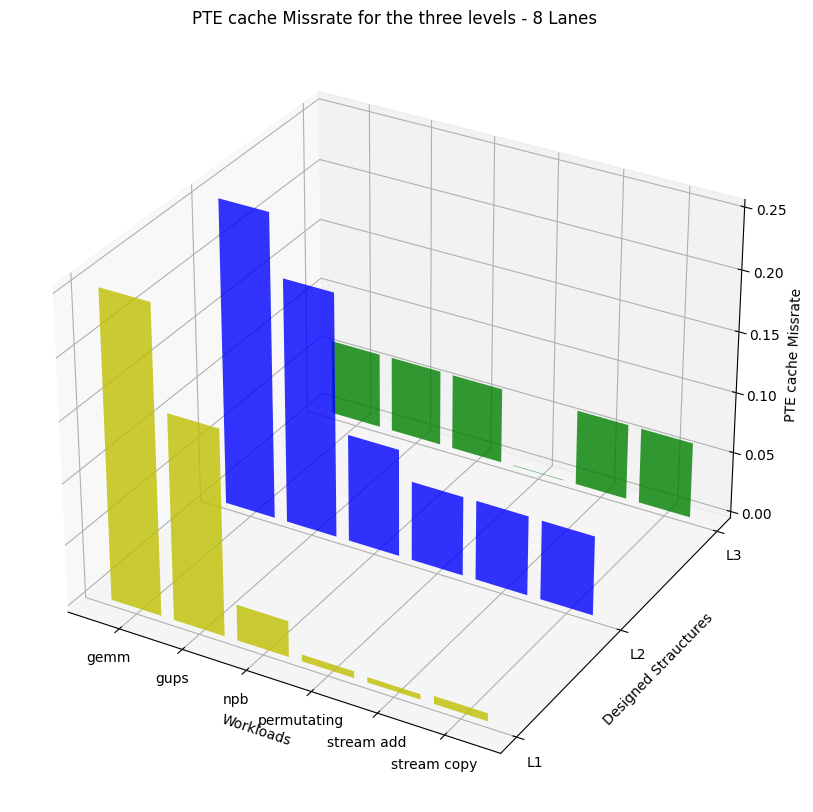

In [25]:
fig = plt.figure(figsize=(10, 10))
pte_cache_missrate_n_design = np.mean(pte_cache_missrate_dict, axis=(2)) # [6, 3, 3]
print(pte_cache_missrate_n_design) 
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 3, num=3)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g']
yticks = ['L1', 'L2', 'L3']
for c, k in zip(colors, [1, 2, 3]):
    xs = x
    ys = pte_cache_missrate_n_design[:, 0, k-1] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("PTE cache Missrate")
plt.title('PTE cache Missrate for the three levels - 8 Lanes')
plt.savefig('figures/PTE cache Missrate-8Lanes.png')

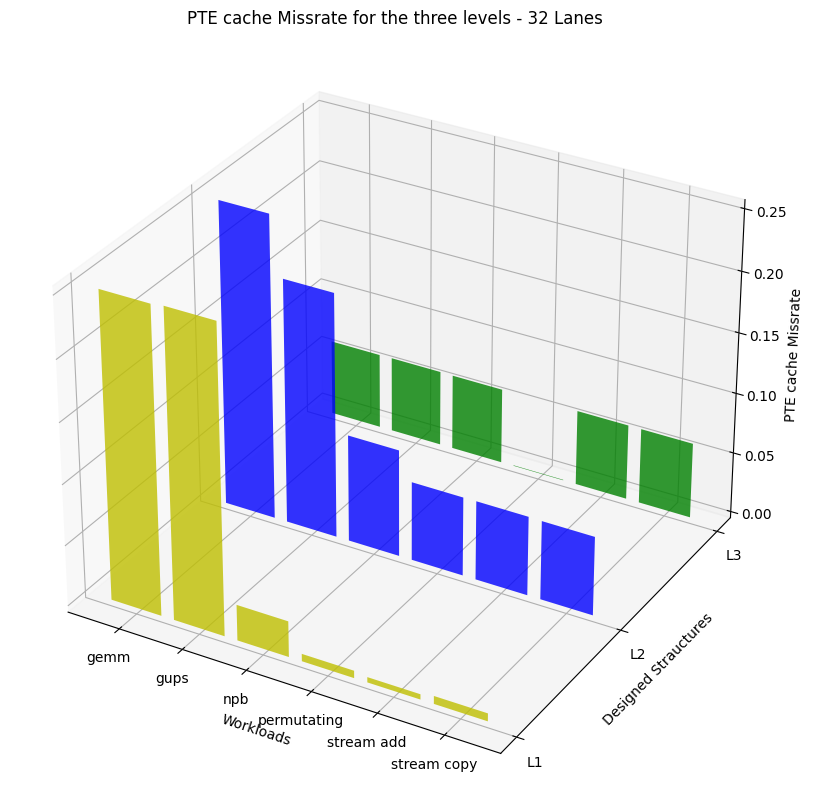

In [26]:
fig = plt.figure(figsize=(10, 10))
pte_cache_missrate_n_design = np.mean(pte_cache_missrate_dict, axis=(2)) # [6, 3, 3]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 3, num=3)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g']
yticks = ['L1', 'L2', 'L3']
for c, k in zip(colors, [1, 2, 3]):
    xs = x
    ys = pte_cache_missrate_n_design[:, 1, k-1] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("PTE cache Missrate")
plt.title('PTE cache Missrate for the three levels - 32 Lanes')
plt.savefig('figures/PTE cache Missrate-32Lanes.png')

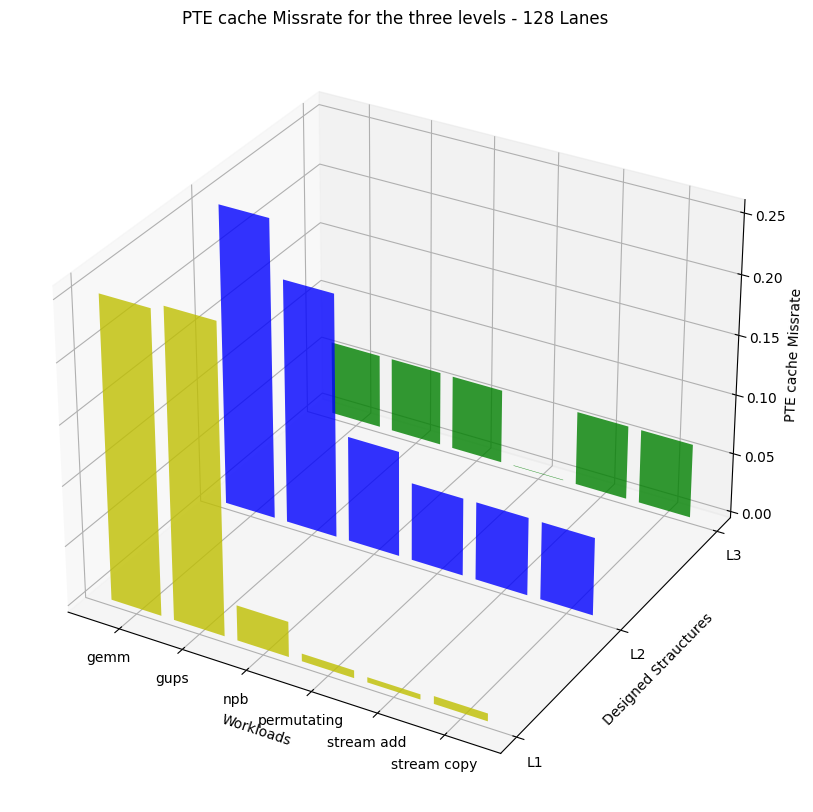

In [27]:
fig = plt.figure(figsize=(10, 10))
pte_cache_missrate_n_design = np.mean(pte_cache_missrate_dict, axis=(2)) # [6, 3, 3]
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 3, num=3)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g']
yticks = ['L1', 'L2', 'L3']
for c, k in zip(colors, [1, 2, 3]):
    xs = x
    ys = pte_cache_missrate_n_design[:, 2, k-1] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("PTE cache Missrate")
plt.title('PTE cache Missrate for the three levels - 128 Lanes')
plt.savefig('figures/PTE cache Missrate-128Lanes.png')

In [28]:
import matplotlib.pyplot as plt
import numpy as np

l1_tlb_missrate_annotation = ['{:.2f}'.format(i) for i in l1_tlb_missrate_global]
l2_tlb_missrate_annotation = ['{:.2f}'.format(i) for i in l2_tlb_missrate_global]
l1_tlb_missrate_by_workload_annotation = [['{:.2f}'.format(j) for j in sublist] for sublist in l1_tlb_missrate_by_workload]
l2_tlb_missrate_by_workload_annotation = [['{:.2f}'.format(j) for j in sublist] for sublist in l2_tlb_missrate_by_workload]
l1_tlb_missrate_by_num_lanes_annotation = [['{:.2f}'.format(j) for j in sublist] for sublist in l1_tlb_missrate_by_num_lanes]
l2_tlb_missrate_by_num_lanes_annotation = [['{:.2f}'.format(j) for j in sublist] for sublist in l2_tlb_missrate_by_num_lanes]
l1_tlb_missrate_by_page_size_annotation = [['{:.2f}'.format(j) for j in sublist] for sublist in l1_tlb_missrate_by_page_size]
l2_tlb_missrate_by_page_size_annotation = [['{:.2f}'.format(j) for j in sublist] for sublist in l2_tlb_missrate_by_page_size]

NameError: name 'l1_tlb_missrate_global' is not defined

In [ ]:
l1_tlb_missrate_global = np.array(l1_tlb_missrate_global, dtype=float)
fig1 = plt.figure()
x = np.linspace(1, 4, num=4, endpoint=False)
x_name = ['D1', 'D2', 'D3', 'D4']
plt.xlabel("Designed Strauctures")
plt.xticks(x, x_name)
plt.ylabel("L1 TLB Miss Rate")
# plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
for i, j in zip(x, l1_tlb_missrate_annotation):
    plt.annotate(str(j), xy=(i, float(j)), xytext=(4, 0), textcoords='offset points')
# plt.ylim(1, 0)
plt.plot(x, l1_tlb_missrate_global)
plt.title('L1 TLB Miss Rate for the four Designs')
plt.savefig('figures/L1 TLB Miss Rate.png')

In [ ]:
l2_tlb_missrate_global = np.array(l2_tlb_missrate_global, dtype=float)
fig2 = plt.figure()
x = np.linspace(1, 4, num=4, endpoint=False)
x_name = ['D1', 'D2', 'D3', 'D4']
plt.xlabel("Designed Strauctures")
plt.xticks(x, x_name)
plt.ylabel("L2 TLB Miss Rate")
# plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
for i, j in zip(x, l2_tlb_missrate_annotation):
    plt.annotate(str(j), xy=(i, float(j)), xytext=(4, 0), textcoords='offset points')
# plt.ylim(0, 1)
plt.plot(x, l2_tlb_missrate_global)
plt.title('L2 TLB Miss Rate for the four Designs')
plt.savefig('figures/L2 TLB Miss Rate.png')

In [ ]:
fig = plt.figure(figsize=(10, 10))
address_coalescer_missrate_n_design = np.mean(address_coalescer_missrate_dict, axis=(2)) # [6, 3, 2]
print(address_coalescer_missrate_n_design) 
x = np.linspace(1, 6, num=6)
y = np.linspace(1, 3, num=3)
ax = fig.add_subplot(projection='3d')
colors = ['y', 'b', 'g']
yticks = ['D4', 'D3', 'D2']
for c, k in zip(colors, [1, 2, 3]):
    xs = x
    ys = address_coalescer_missrate_n_design[:, k-1, 0] # [6]
    cs = [c] * len(x)
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

xticks = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']
ax.set_xlabel("Workloads")
ax.set_xticks(x, xticks)
ax.set_ylabel("Designed Strauctures")
ax.set_yticks(y, yticks)
ax.set_zlabel("Address Coalescer Missrate")
plt.title('Address Coalescer Missrate for the three Designs - 4KiB')
plt.savefig('figures/Address Coalescer Missrate-4KiB.png')

In [ ]:
l1_tlb_missrate_by_workload_annotation_T = list(zip(*l1_tlb_missrate_by_workload_annotation))
l1_tlb_missrate_by_workload_annotation_T = np.array(l1_tlb_missrate_by_workload_annotation_T, dtype=float)
x = np.linspace(1, 4, num=4, endpoint=False)
bar_width = 0.1
multiplier = 0
x_name = ['D1', 'D2', 'D3', 'D4']
workload_name = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']


fig3, ax = plt.subplots()
for i in range(len(workload_name)):
    bars = ax.bar(x + (i * bar_width), l1_tlb_missrate_by_workload_annotation_T[i], bar_width, alpha=0.8, label=workload_name[i])

ax.set_xlabel('Designed Strauctures by workload')
ax.set_ylabel('L1 TLB Miss Rate')
ax.set_title('L1 TLB Miss Rate for the four Designs by workload')
ax.set_xticks(x + (bar_width * (len(workload_name) - 1)) / 2)
ax.set_xticklabels(x_name)
ax.legend(loc='upper right', ncol=2, bbox_to_anchor=(0, -0.1, 1, 1), framealpha=0.3)

# plt.tight_layout()
fig3.show()
fig3.savefig('figures/L1 TLB Miss Rate by workload.png')

In [ ]:
l2_tlb_missrate_by_workload_annotation_T = list(zip(*l2_tlb_missrate_by_workload_annotation))
l2_tlb_missrate_by_workload_annotation_T = np.array(l2_tlb_missrate_by_workload_annotation_T, dtype=float)
x = np.linspace(1, 4, num=4, endpoint=False)
bar_width = 0.1
multiplier = 0
x_name = ['D1', 'D2', 'D3', 'D4']
workload_name = ['gemm', 'gups', 'npb', 'permutating', 'stream add', 'stream copy']

fig4, ax = plt.subplots()
for i in range(len(workload_name)):
    bars = ax.bar(x + (i * bar_width), l2_tlb_missrate_by_workload_annotation_T[i], bar_width, alpha=0.8, label=workload_name[i])

ax.set_xlabel('Designed Strauctures by workload')
ax.set_ylabel('L2 TLB Miss Rate')
ax.set_title('L2 TLB Miss Rate for the four Designs by workload')
ax.set_xticks(x + (bar_width * (len(workload_name) - 1)) / 2)
ax.set_xticklabels(x_name)
ax.legend(loc='upper left', ncol=1, bbox_to_anchor=(0, -0.1, 1, 1), framealpha=0.3)

# plt.tight_layout()
fig4.show()
fig4.savefig('figures/L2 TLB Miss Rate by workload.png')

In [ ]:
l1_tlb_missrate_by_num_lanes_annotation_T = list(zip(*l1_tlb_missrate_by_num_lanes_annotation))
l1_tlb_missrate_by_num_lanes_annotation_T = np.array(l1_tlb_missrate_by_num_lanes_annotation_T, dtype=float)
x = np.linspace(1, 4, num=4, endpoint=False)
bar_width = 0.1
multiplier = 0
x_name = ['D1', 'D2', 'D3', 'D4']
num_lane_name = ['8', '32', '128']

fig5, ax = plt.subplots()
for i in range(len(num_lane_name)):
    bars = ax.bar(x + (i * bar_width), l1_tlb_missrate_by_num_lanes_annotation_T[i], bar_width, alpha=0.8, label=num_lane_name[i])

ax.set_xlabel('Designed Strauctures by number of lanes')
ax.set_ylabel('L1 TLB Miss Rate')
ax.set_title('L1 TLB Miss Rate for the four Designs by number of lanes')
ax.set_xticks(x + (bar_width * (len(num_lane_name) - 1)) / 2)
ax.set_xticklabels(x_name)
ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(0, -0.1, 1, 1), framealpha=0.3)

# plt.tight_layout()
fig5.show()
fig5.savefig('figures/L1 TLB Miss Rate by number of lanes.png')

In [ ]:
l2_tlb_missrate_by_num_lanes_annotation_T = list(zip(*l2_tlb_missrate_by_num_lanes_annotation))
l2_tlb_missrate_by_num_lanes_annotation_T = np.array(l2_tlb_missrate_by_num_lanes_annotation_T, dtype=float)
x = np.linspace(1, 4, num=4, endpoint=False)
bar_width = 0.1
multiplier = 0
x_name = ['D1', 'D2', 'D3', 'D4']
num_lane_name = ['8', '32', '128']

fig6, ax = plt.subplots()
for i in range(len(num_lane_name)):
    bars = ax.bar(x + (i * bar_width), l2_tlb_missrate_by_num_lanes_annotation_T[i], bar_width, alpha=0.8, label=num_lane_name[i])

ax.set_xlabel('Designed Strauctures by number of lanes')
ax.set_ylabel('L2 TLB Miss Rate')
ax.set_title('L2 TLB Miss Rate for the four Designs by number of lanes')
ax.set_xticks(x + (bar_width * (len(num_lane_name) - 1)) / 2)
ax.set_xticklabels(x_name)
ax.legend(loc='best', ncol=1, bbox_to_anchor=(0, -0.1, 1, 1), framealpha=0.3)

# plt.tight_layout()
fig6.show()
fig6.savefig('figures/L2 TLB Miss Rate by number of lanes.png')

In [ ]:
l1_tlb_missrate_by_page_size_annotation_T = list(zip(*l1_tlb_missrate_by_page_size_annotation))
l1_tlb_missrate_by_page_size_annotation_T = np.array(l1_tlb_missrate_by_page_size_annotation_T, dtype=float)
x = np.linspace(1, 4, num=4, endpoint=False)
bar_width = 0.1
multiplier = 0
x_name = ['D1', 'D2', 'D3', 'D4']
num_lane_name = ['4 KiB', '2 MiB']

fig7, ax = plt.subplots()
for i in range(len(num_lane_name)):
    bars = ax.bar(x + (i * bar_width), l1_tlb_missrate_by_page_size_annotation_T[i], bar_width, alpha=0.8, label=num_lane_name[i])

ax.set_xlabel('Designed Strauctures by page size')
ax.set_ylabel('L1 TLB Miss Rate')
ax.set_title('L1 TLB Miss Rate for the four Designs by page size')
ax.set_xticks(x + (bar_width * (len(num_lane_name) - 1)) / 2)
ax.set_xticklabels(x_name)
ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(0, -0.1, 1, 1), framealpha=0.3)

# plt.tight_layout()
fig7.show()
fig7.savefig('figures/L1 TLB Miss Rate by page size.png')

In [ ]:
l2_tlb_missrate_by_page_size_annotation_T = list(zip(*l2_tlb_missrate_by_page_size_annotation))
l2_tlb_missrate_by_page_size_annotation_T = np.array(l2_tlb_missrate_by_page_size_annotation_T, dtype=float)
x = np.linspace(1, 4, num=4, endpoint=False)
bar_width = 0.1
multiplier = 0
x_name = ['D1', 'D2', 'D3', 'D4']
num_lane_name = ['4 KiB', '2 MiB']

fig8, ax = plt.subplots()
for i in range(len(num_lane_name)):
    bars = ax.bar(x + (i * bar_width), l2_tlb_missrate_by_page_size_annotation_T[i], bar_width, alpha=0.8, label=num_lane_name[i])

ax.set_xlabel('Designed Strauctures by page size')
ax.set_ylabel('L2 TLB Miss Rate')
ax.set_title('L2 TLB Miss Rate for the four Designs by page size')
ax.set_xticks(x + (bar_width * (len(num_lane_name) - 1)) / 2)
ax.set_xticklabels(x_name)
ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(0, -0.1, 1, 1), framealpha=0.3)

# plt.tight_layout()
fig8.show()
fig8.savefig('figures/L2 TLB Miss Rate by page size.png')